In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


In [3]:
dataset = pd.read_csv('../../data/Position_Salaries.csv')

In [5]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [11]:
X = np.array(dataset['Level']).reshape(-1,1)
y = np.array(dataset['Salary']).reshape(-1,1)

x_stc = StandardScaler()
y_stc = StandardScaler()

X = x_stc.fit_transform(X)
y = y_stc.fit_transform(y)



numpy.ndarray

In [25]:
rbfsvr = SVR(kernel='rbf')
rbfsvr.fit(X,y)
rbf_predict = rbfsvr.predict(X)

linearsvr = SVR(kernel = 'linear')
linearsvr.fit(X,y)
linear_predict = linearsvr.predict(X)

polysvr = SVR(kernel='poly')
polysvr.fit(X,y)
poly_predict = polysvr.predict(X)

C:\Users\firat\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\firat\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\firat\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


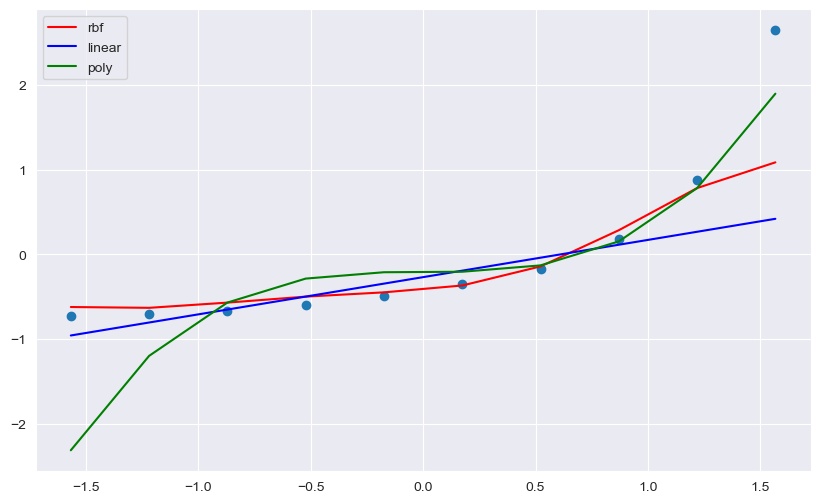

In [26]:
#plt
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,rbf_predict,color='red',label='rbf')
plt.plot(X,linear_predict,color='blue',label='linear')
plt.plot(X,poly_predict,color='green',label='poly')
plt.legend()


plt.show()


In [27]:
# Hyper Tune
from sklearn.model_selection import GridSearchCV

params = { 'C' : [1,10,100,1000,10000],'gamma': [1,0.1,0.01],'kernel' : ['rbf','linear','poly']}

CV = GridSearchCV(estimator=SVR(),param_grid=params,cv=10)
CV.fit(X,y)
print(CV.best_params_)




C:\Users\firat\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\firat\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\firat\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\firat\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\firat\anaconda3\Lib\site-packages\sklearn\utils

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


C:\Users\firat\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\firat\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\firat\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\firat\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\firat\anaconda3\Lib\site-packages\sklearn\metri

In [28]:
best_model = SVR(C = CV.best_params_['C'],gamma=CV.best_params_['gamma'],kernel=CV.best_params_['kernel'])
best_model.fit(X,y)
best_predict = best_model.predict(X)


C:\Users\firat\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


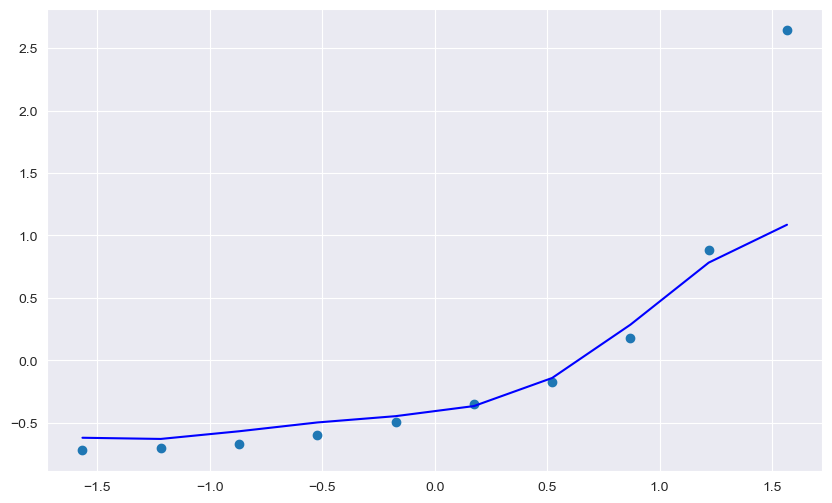

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,best_predict,color = 'b')
